In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('t.csv')
df = df.fillna(0)
df.sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OID_            10000 non-null  int64  
 1   Join_Count      10000 non-null  int64  
 2   TARGET_FID      10000 non-null  int64  
 3   Join_Count_1    10000 non-null  int64  
 4   TARGET_FID_1    10000 non-null  int64  
 5   Join_Count_12   10000 non-null  int64  
 6   TARGET_FID_12   10000 non-null  int64  
 7   buildingP       10000 non-null  float64
 8   FID_二调          10000 non-null  float64
 9   AREA            10000 non-null  float64
 10  STREET_COD      10000 non-null  float64
 11  LAND_USE_T      10000 non-null  object 
 12  区名              10000 non-null  object 
 13  Shape_Length_1  10000 non-null  float64
 14  Shape_Area_1    10000 non-null  float64
 15  pneed           10000 non-null  float64
 16  pointid         10000 non-null  float64
 17  grid_code       10000 non-null  

/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [54]:
df['pneed'] = df['grid_code'] * 0.9 * 100

In [55]:
df['test'] = df['buildingP'] - df['pneed']
df.describe()

,OID_,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,Join_Count_12,TARGET_FID_12,buildingP,FID_二调,AREA,STREET_COD,Shape_Length_1,Shape_Area_1,pneed,pointid,grid_code,Shape_Length,Shape_Area,test
count,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5000.50000,65.717900,5000.50000,640.53060,5000.50000,3.206500,5000.50000,2.017134e+04,5.138884e+04,292.928334,777.121400,33.403331,277.556892,57647.754000,1.957713e+06,640.53060,4.697469e-02,1.377999e-04,-3.747642e+04
std,2886.89568,218.458119,2886.89568,630.83794,2886.89568,22.240952,2886.89568,6.860666e+04,2.249180e+05,2791.854451,3175.072702,437.277431,2750.321696,56775.414612,2.056384e+06,630.83794,9.976369e-10,5.952011e-12,9.637864e+04
min,1.00000,0.000000,1.00000,0.00000,1.00000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,4.697468e-02,1.377998e-04,-1.469700e+05
25%,2500.75000,0.000000,2500.75000,0.00000,2500.75000,0.000000,2500.75000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,4.697469e-02,1.377999e-04,-1.133100e+05
50%,5000.50000,0.000000,5000.50000,520.00000,5000.50000,0.000000,5000.50000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,46800.000000,1.352326e+06,520.00000,4.697469e-02,1.377999e-04,-2.990387e+04
75%,7500.25000,0.000000,7500.25000,1285.00000,7500.25000,0.000000,7500.25000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,115650.000000,3.607384e+06,1285.00000,4.697469e-02,1.377999e-04,0.000000e+00
max,10000.00000,2702.000000,10000.00000,1633.00000,10000.00000,429.000000,10000.00000,1.433988e+06,1.805177e+06,101748.046302,19503.000000,16591.882124,101748.043901,146970.000000,6.398965e+06,1633.00000,4.697469e-02,1.377999e-04,1.343718e+06


In [56]:
def showMatrix(value):
    v = value.values.reshape(100, 100)
    plt.imshow(v, cmap='magma')

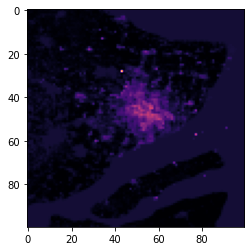

In [57]:
showMatrix(df['test'])

In [58]:
(df['test'] < 0).sum()

5613

In [59]:
(df['test'] > 0).sum()

1138

In [61]:
def calEucDistance(value1, value2):
    return ((value1[0] - value2[0])**2 + (value1[1] - value2[1])**2)**0.5
calEucDistance((2,39), (98,86))

106.88779163215975

In [62]:
twoDArray = df['test'].values.reshape(100, 100)
supplyIndex = []
demandIndex = []
for i in range(99):
    for j in range(99):
        if twoDArray[i][j] > 0:
            supplyIndex.append((i,j))
        elif twoDArray[i][j] < 0:
            demandIndex.append((i,j))
len(supplyIndex)

1137

In [63]:
s_to_d_distance = {}
for s in supplyIndex:
    s_to_d_distance[s] = []
    for d in demandIndex:
        s_to_d_distance[s].append([d, calEucDistance(s, d)])



In [68]:
sortedDistanceDict = {}
for i in s_to_d_distance:
    sortedDistanceDict[i] = sorted(s_to_d_distance[i], key=lambda x: x[1])

In [69]:
twoDArray

array([[-120060., -113310., -115830., ...,       0.,       0.,       0.],
       [-115650., -108990., -111780., ...,       0.,       0.,       0.],
       [-130770., -130860., -134190., ...,       0.,       0.,       0.],
       ...,
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.]])

In [70]:
indexWithValueSupply = []
for index in sortedDistanceDict.keys():
    supply = twoDArray[index]
    indexWithValueSupply.append([index, supply])
indexWithValueSupply   


[[(2, 43), 10003.9267578],
 [(2, 44), 17256.015625],
 [(3, 41), 15515.4951172],
 [(3, 42), 12772.8994141],
 [(3, 43), 137198.796875],
 [(3, 44), 196940.703125],
 [(3, 45), 9127.0107422],
 [(4, 40), 71123.5625],
 [(4, 41), 113794.484375],
 [(4, 42), 163154.203125],
 [(4, 43), 140242.171875],
 [(4, 44), 169813.28125],
 [(4, 45), 42885.74999999999],
 [(5, 41), 11541.265624999993],
 [(5, 42), 10067.078125],
 [(5, 44), 37262.4375],
 [(5, 45), 19833.875],
 [(6, 43), 26857.9765625],
 [(7, 45), 18047.3945313],
 [(9, 33), 156745.71875],
 [(9, 53), 34105.0507813],
 [(9, 54), 1233.467041],
 [(10, 40), 97722.09375],
 [(11, 45), 106065.953125],
 [(12, 45), 16883.5390625],
 [(13, 34), 413058.0625],
 [(14, 88), 17.8512058],
 [(14, 91), 7.8755064],
 [(15, 63), 17279.5390625],
 [(15, 94), 119.626709],
 [(16, 41), 40571.28125],
 [(16, 61), 1462.484375],
 [(16, 93), 16187.3027344],
 [(17, 15), 109103.9375],
 [(17, 28), 130289.40625],
 [(17, 41), 119333.28125],
 [(17, 42), 155131.34375],
 [(17, 43), 10375

In [71]:
indexWithValueSupply.sort(key=lambda x : x[1], reverse=True)
indexWithValueSupply

[[(28, 43), 1343717.625],
 [(57, 77), 723276.1875],
 [(45, 56), 697812.625],
 [(45, 57), 692116.125],
 [(48, 57), 687595.125],
 [(48, 52), 665741.625],
 [(48, 55), 654784.625],
 [(50, 60), 648719.75],
 [(45, 51), 638377.9375],
 [(44, 56), 628962.5],
 [(44, 49), 617351.6875],
 [(47, 55), 613806.5],
 [(46, 52), 594369.625],
 [(49, 57), 593749.4375],
 [(47, 50), 586679.125],
 [(48, 58), 584744.0],
 [(49, 55), 575004.875],
 [(49, 56), 572834.375],
 [(47, 49), 572642.5],
 [(49, 59), 570010.0625],
 [(48, 54), 562691.875],
 [(48, 56), 553654.5],
 [(44, 51), 548234.125],
 [(48, 59), 544244.125],
 [(50, 59), 540845.0],
 [(48, 51), 528104.1875],
 [(48, 53), 526139.3125],
 [(46, 53), 515830.46875],
 [(50, 61), 514783.4375],
 [(47, 56), 512770.34375],
 [(44, 50), 511325.65625],
 [(44, 57), 509634.3125],
 [(52, 53), 496287.28125],
 [(46, 56), 491963.3125],
 [(55, 53), 491643.21875],
 [(35, 45), 491349.84375],
 [(49, 58), 485993.8125],
 [(42, 53), 485252.71875],
 [(50, 56), 483972.40625],
 [(44, 48)

In [80]:
distance_array = []
testTwoDArray = twoDArray.copy()
for supply in indexWithValueSupply:
    tempSupply = testTwoDArray[supply[0]]
    for demand in sortedDistanceDict[supply[0]]:
        tempDemand = testTwoDArray[demand[0]]
        # print(tempDemand, tempSupply)
        if tempSupply <= tempDemand:
            tempSupply = 0
            tempDemand += tempSupply
            testTwoDArray[supply[0]] = tempSupply
            testTwoDArray[demand[0]] = tempDemand
            distance_array.append([supply[0], demand[0], calEucDistance(supply[0], demand[0])])
            
        elif tempSupply > tempDemand:
            tempSupply += tempDemand
            tempDemand = 0
            testTwoDArray[supply[0]] = tempSupply
            testTwoDArray[demand[0]] = tempDemand
        else:
            pass
        if tempSupply == 0:
            distance_array.append([supply[0], demand[0], calEucDistance(supply[0], demand[0])])
            break

        

In [43]:
twoDArray[(2,39)]

1282.111084

In [86]:
distance_array.sort(key=lambda x: x[2], reverse=True)

In [87]:
distance_array

[[(47, 67), (21, 51), 30.528675044947494],
 [(47, 67), (21, 51), 30.528675044947494],
 [(44, 66), (22, 45), 30.4138126514911],
 [(44, 66), (22, 45), 30.4138126514911],
 [(45, 69), (23, 48), 30.4138126514911],
 [(45, 69), (23, 48), 30.4138126514911],
 [(46, 70), (76, 69), 30.01666203960727],
 [(46, 70), (76, 69), 30.01666203960727],
 [(40, 55), (17, 74), 29.832867780352597],
 [(40, 55), (17, 74), 29.832867780352597],
 [(46, 65), (75, 58), 29.832867780352597],
 [(46, 65), (75, 58), 29.832867780352597],
 [(47, 66), (26, 45), 29.698484809834994],
 [(47, 66), (26, 45), 29.698484809834994],
 [(47, 68), (26, 89), 29.698484809834994],
 [(47, 68), (26, 89), 29.698484809834994],
 [(45, 62), (29, 37), 29.68164415931166],
 [(45, 62), (29, 37), 29.68164415931166],
 [(44, 65), (70, 79), 29.5296461204668],
 [(44, 65), (70, 79), 29.5296461204668],
 [(45, 65), (30, 40), 29.154759474226502],
 [(45, 65), (30, 40), 29.154759474226502],
 [(46, 57), (31, 32), 29.154759474226502],
 [(46, 57), (31, 32), 29.15

In [44]:
testTwoDArray[(2,39)]

1282.111084

In [20]:
for supply in sortedDistanceDict:
    print(supply)
    break

(2, 39)


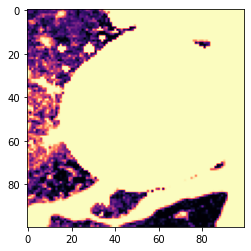

In [73]:
plt.imshow(testTwoDArray, cmap='magma')

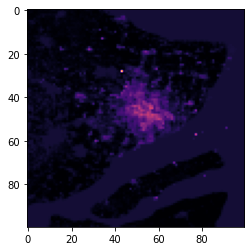

In [74]:
showMatrix(df['test'])

In [75]:
(testTwoDArray > 0).sum()

1

In [76]:
(testTwoDArray < 0).sum()

2900

In [77]:
testTwoDArray

array([[-120060., -113310., -115830., ...,       0.,       0.,       0.],
       [-115650., -108990., -111780., ...,       0.,       0.,       0.],
       [-130770., -130860., -134190., ...,       0.,       0.,       0.],
       ...,
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.]])

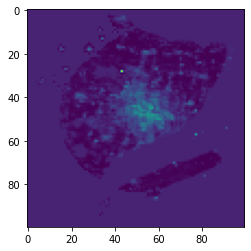

In [78]:
plt.imshow(twoDArray - testTwoDArray)

In [79]:
twoDArray[twoDArray < 0].sum()

-535737666.69184625

In [9]:
sampleSupply = np.array([[0, 0, 0, 0, 0], [0, 5, 8, 0, 0], [0, 0, 0, 4, 0], [0, 3, 0, 11, 0], [0, 0, 0, 0, 0]])
sampleDemand = np.array([[3, 2, 3, 1, 0], [1, 3, 0, 3, 0], [1, 0, 2, 0, 0], [1, 0, 0, 0, 0], [1, 2, 2, 4, 3]])


array([[ 0,  0,  0,  0,  0],
       [ 0,  5,  8,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  3,  0, 11,  0],
       [ 0,  0,  0,  0,  0]])

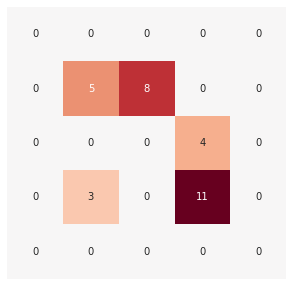

In [99]:
import seaborn as sns
def plotMatrix(array, n):

    plt.figure(figsize=(5,5))
    sns.heatmap(array, annot=True, cmap='RdBu_r', cbar=False, center=0, vmin=-4, vmax=11)
    plt.axis('off')
    plt.savefig('algfig/{}.jpg'.format(n), dpi=600)
plotMatrix(sampleSupply, 1)

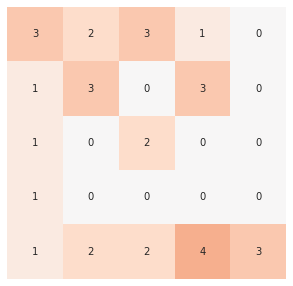

In [100]:
plotMatrix(sampleDemand, 2)

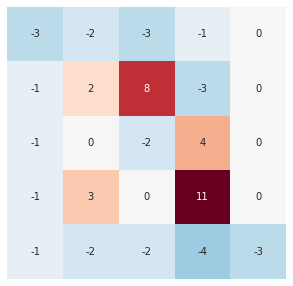

In [101]:
plotMatrix(sampleSupply -sampleDemand, 3)

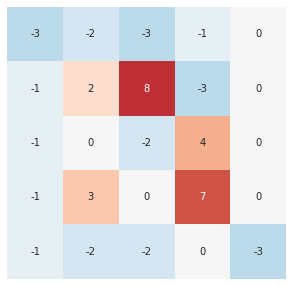

In [102]:
tempArray = sampleSupply -sampleDemand
tempArray[3, 3] = 7
tempArray[4, 3] = 0
plotMatrix(tempArray, 4)

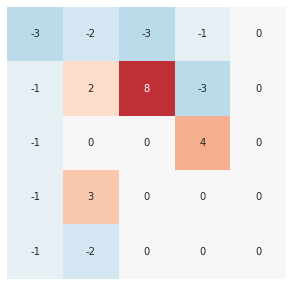

In [103]:
tempArray[3, 3] = 0
tempArray[2, 2] = 0
tempArray[4, 2] = 0
tempArray[4, 4] = 0
plotMatrix(tempArray, 5)

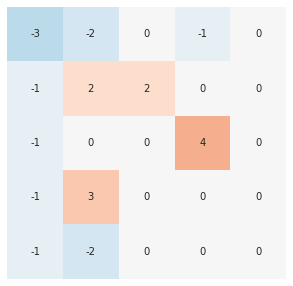

In [104]:
tempArray[1, 2] = 2
tempArray[0, 2] = 0
tempArray[1, 3] = 0
plotMatrix(tempArray, 6)

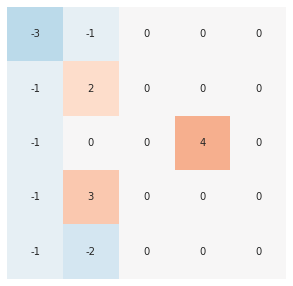

In [105]:
tempArray[1, 2] = 0
tempArray[0, 1] = -1
tempArray[0, 3] = 0
plotMatrix(tempArray, 7)

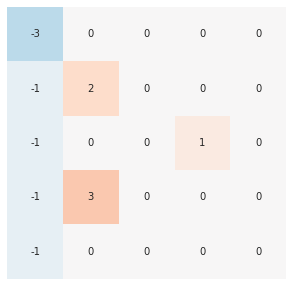

In [106]:
tempArray[0, 1] = 0
tempArray[4, 1] = 0
tempArray[2, 3] = 1

plotMatrix(tempArray, 8)

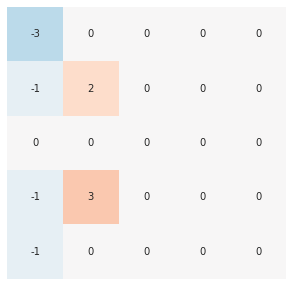

In [107]:
tempArray[2, 0] = 0
tempArray[2, 3] = 0

plotMatrix(tempArray, 9)

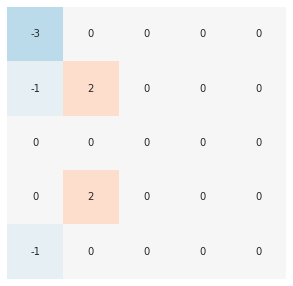

In [108]:
tempArray[3, 0] = 0
tempArray[3, 1] = 2

plotMatrix(tempArray, 10)

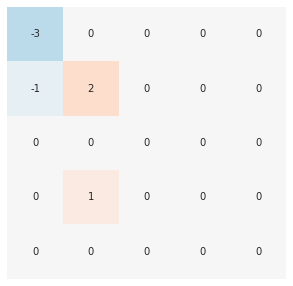

In [109]:
tempArray[4, 0] = 0
tempArray[3, 1] = 1

plotMatrix(tempArray, 11)

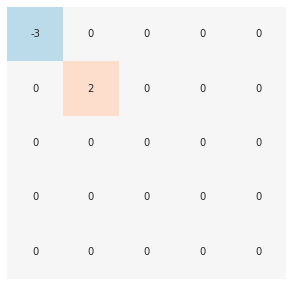

In [110]:
tempArray[1, 0] = 0
tempArray[3, 1] = 0

plotMatrix(tempArray, 12)

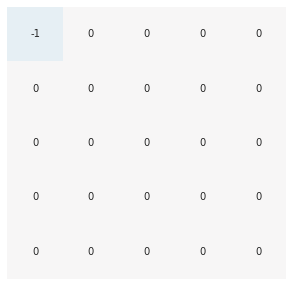

In [111]:
tempArray[0, 0] = -1
tempArray[1, 1] = 0

plotMatrix(tempArray, 13)